# Ejercicios regresion logistica usando con sklearn

---



#Regresión logsitica con dataset  local 
---
dataset con la cantidad de horas de estudio para un examen vs el resultado (aprobado/reprobado)
https://github.com/luisFernandoCastellanosG/Machine_learning/blob/master/Databaset_para_trabajar_sklearn/horas_estudio_vs_aprobacion.csv





##P1.Cargando Librerías necesarias

In [10]:
import numpy as np              #Mejora el soporte para vectores y matrices
import pandas as pd             #Estructura de datos (Ciencia de datos)

import matplotlib.pyplot as plt #Para graficar
import seaborn as sns           #interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##P2. Conectarse a google drive y cargar el CSV con el dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Cargar el dataset en un dataframe de pandas

In [20]:
df = pd.DataFrame()
df = pd.read_csv('/content/gdrive/My Drive/IA/Databaset_para_trabajar_sklearn/horas_estudio_vs_aprobacion.csv', encoding='utf-8')

##P3.Conociendo los datos que tiene el dataset

In [21]:
#primeros 5 regirstros del dataframe
df.head()
#dimensiones del dataframe
#df.shape

,horas,aprueba
0,0.50,1
1,2.00,0
2,0.75,0
3,2.75,1
4,2.75,1


hay datos nulos?

In [16]:
df.isnull().sum()

horas      0
aprueba    0
dtype: int64

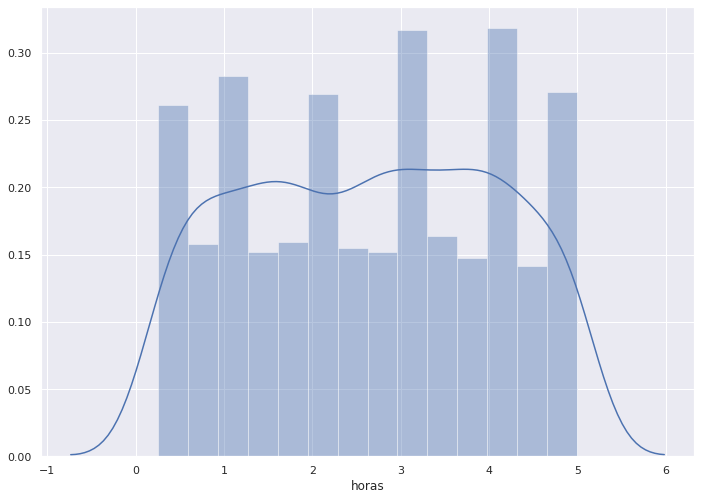

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(df['horas'])                #agregamos los datos
plt.show()    

## P4.Separando los datos para el entrenamiento


In [27]:
#En X colocaremos el tiempo de estudio que tomaron los estudiantes antes del examen
#apilamos los datos que vienen en 1d a 2d  
#opcion 1: usamos np.c_
#X = pd.DataFrame(np.c_[df['horas']], columns = ['horas'])
#opcion2: usamos .reshape(-1, 1)
X = np.array(df['horas']).reshape(-1, 1)
#En Y colocaremos el resultado del examen (1 / 0 ) (aprobado / reprobado)
y= np.array(df['aprueba'])
print(X)

[[0.5 ]
 [2.  ]
 [0.75]
 ...
 [2.75]
 [4.75]
 [4.  ]]


##P5. importamos la clase LogisticRegresion de scikit-learn

In [24]:
#clase de regresión logistica disponsible en sklearn
from sklearn.linear_model import LogisticRegression
#Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

##P6. Entrena la regresión logística con los datos de entrenamiento


In [28]:
#entrenando modelo de regresión logistica
regresion_logistica.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##P7.Haciendo predicciones
Tomaremos una grupo de horas y miraremos que probabilidad de pasar el examen tenemos

In [29]:
#definimos que pasa si el estudiante estudia entre 1 a 6 horas
X_nuevo = np.array([1, 2, 3, 4, 5, 6]).reshape(-1,1)
#ejecutamos la predicción
prediccion = regresion_logistica.predict(X_nuevo)
print(prediccion)

[0 0 0 1 1 1]


##P8. Generando probabilidades de la predicción

In [33]:
probabilidades_prediccion = regresion_logistica.predict_proba(X_nuevo)
#la primera columna es la probabilidad de reprobar 
#la segunda columna es  la probabilidad de aprobar
print(probabilidades_prediccion)
#si solo nos interesa la probabilidad de aprobar
print(probabilidades_prediccion[:,1])

[[0.5112111  0.4887889 ]
 [0.50683522 0.49316478]
 [0.50245829 0.49754171]
 [0.49808099 0.50191901]
 [0.49370398 0.50629602]
 [0.48932793 0.51067207]]
[0.4887889  0.49316478 0.49754171 0.50191901 0.50629602 0.51067207]


#El Mismo estudio pero teniendo en cuenta horas de tutorias

---

Vuelven a hacer otro estudio y adicionan las horas de tutoría que toma cada estudiante en el mes, con ello quieren predecir que probabilidades tiene de pasar el examen

##P1.Cargando Librerías necesarias

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##P2. Conectarse a google drive y cargar el CSV con el dataset

In [1]:
#si ya tiene habilitado la carpeta de gdrive no ejecute este código
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
df = pd.DataFrame()
df = pd.read_csv('/content/gdrive/My Drive/IA/Databaset_para_trabajar_sklearn/mercadeo_bancario.csv', encoding='utf-8')
#df = pd.read_csv('/content/gdrive/My Drive/IA/Databaset_para_trabajar_sklearn/horas_estudio_tutorias_vs_aprobacion.csv', encoding='utf-8')

##P3. Conociendo los datos

In [5]:
#primeros 5 registros del dataframe
df.head(20)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,4,cellular,aug,fri,137,2,1,1184,1
5,30,management,divorced,preschool,6,no,yes,no,499476,1,cellular,jul,tue,68,90,0,1553,0
6,37,blue-collar,married,preschool,6,no,yes,no,86520,5,cellular,may,thu,204,66,0,442,0
7,39,blue-collar,divorced,tecnical_school,4,no,yes,no,176081,1,cellular,may,fri,191,51,0,495,0
8,36,admin.,married,university.degree,6,no,no,no,0,3,cellular,jun,mon,174,0,1,1097,1
9,27,blue-collar,single,preschool,3,no,yes,no,323709,1,cellular,apr,thu,191,33,1,414,0


In [33]:
#dimensiones del dataframe
print("matrix df [MxN] ->"+str(df.shape))
#verificamos que no hayan nulos
print("---Columnas con valores nulos--")
print(df.isnull().sum())

matrix df [MxN] ->(1000, 3)
---Columnas con valores nulos--
horas_autoestudio_diario    0
tutorias_mes                0
aprobo_perdio               0
dtype: int64


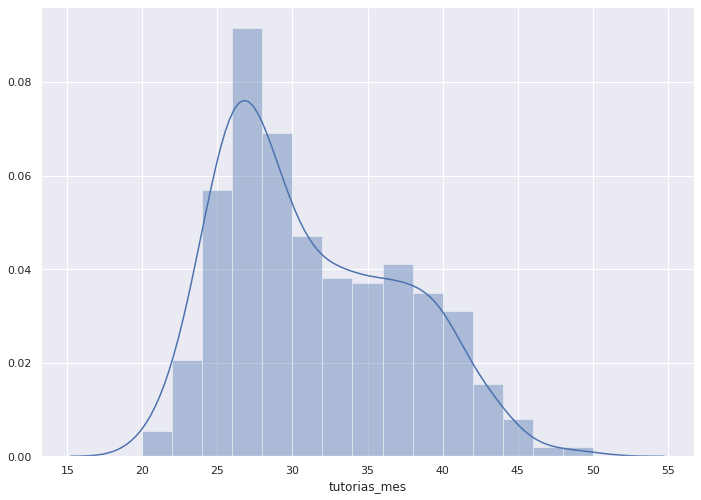

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(df['tutorias_mes'])                #agregamos los datos
plt.show()    

##P4.Separando los datos para el entrenamiento

---

separaremos las características y etiquetamos como **X** e **Y** respectivamente. 


*   la variable X (horas_autoestudio_diario +	tutorias_mes)
*   la varible Y (aprobo_perdio)

In [35]:
x = df.drop('aprobo_perdio',axis = 1)
y = df.aprobo_perdio

Dividiremos los datos en conjuntos de **train** y **test**. Esto separará 25%(! valor predeterminado) de los datos en un subconjunto para la parte de prueba y el 75% restante se usará para nuestro subconjunto de entrenamiento.

In [41]:
#separamos los datos 25%(test) y 75%(train)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)
#Si deseamos cambiar la proporción solo debemos agregar la variable test_size=0.x 
#x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4,test_size=0.2)

##P5. importamos la clase LogisticRegresion de scikit-learn

In [39]:
#Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

##P6. Entrena la regresión logística con los datos de entrenamiento

In [40]:
#entrenando modelo de regresión logistica
regresion_logistica.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##P7.Haciendo predicciones

In [76]:
#usaremos el 25% de los datos para probar el modelo
#ejecutamos la predicción con datos de prueba (x_test)
y_prediccion = regresion_logistica.predict(x_test)

[1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1
 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0
 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1]


##P8. Generando probabilidades de la predicción

In [77]:
#comparamos los datos de predicción (y_prediccion) VS los datos de prueba (y_test)
exactitud = metrics.accuracy_score(y_test, y_prediccion)
print("exactitud_percentaje= "+str(100 * exactitud))

exactitud_percentaje= 97.2


probemos con datos manuales para probar el modelo

In [79]:
#hagamos prediccion con datos manuales: 
#              [horas_estudio , horas_tutoria]
#1-estudiante: [ 4            , 38 ]
#2-estudiante: [ 8            , 29 ]
#3-estudiante: [ 1            , 1  ]
alumnos=np.array([[4, 38], [8, 29],[1,1],[0,0]])
x_nuevo = pd.DataFrame(alumnos,columns = ['horas_autoestudio_diario','tutorias_mes'])
y_prediccion = regresion_logistica.predict(x_nuevo)
print(y_prediccion)

[0 1 1 1]
